# Feature importance and model selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [119]:
path = '/content/drive/My Drive/Constructor_Academy/Gitlab/projects/telecom_churn_prediction/data/processed/onehot_encoding_standard_scaling_data.csv'
#path = '/content/drive/My Drive/Constructor_Academy/Gitlab/projects/telecom_churn_prediction/data/raw/telecom_users.csv'

df = pd.read_csv(path)
print(df.columns)
#df.drop("Unnamed: 0", axis=1, inplace=True)
#df.drop(columns="customerID", inplace=True)
df.drop(columns="gender_Female", inplace=True)
df.drop(columns="SeniorCitizen_0", inplace=True)
df.drop(columns="Partner_No", inplace=True)
df.drop(columns="Dependents_No", inplace=True)
df.drop(columns=["PhoneService_No",'OnlineSecurity_No_internet_service', 'OnlineBackup_No_internet_service',
                 'DeviceProtection_No_internet_service', 'TechSupport_No_internet_service',
                 'StreamingTV_No_internet_service', 'StreamingMovies_No_internet_service', 'Churn_No'
                 ] , inplace=True)

print(df.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One_year',
       '

In [28]:
df.head(10)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No_phone_service,...,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_Yes
0,1.611381,-1.353483,-0.247769,True,False,True,True,True,False,False,...,False,False,True,True,False,False,True,False,False,False
1,0.468468,0.774066,0.736669,False,False,False,False,True,True,False,...,True,False,False,False,True,False,True,False,False,False
2,0.223558,0.335602,0.251453,False,True,True,False,True,False,False,...,True,False,False,False,True,True,False,False,False,True
3,-1.164265,-0.297182,-0.905725,True,False,False,False,True,True,False,...,True,False,False,False,True,False,False,True,False,False
4,-1.245901,-0.378564,-0.958057,True,False,False,False,True,True,False,...,True,False,False,True,False,False,False,True,False,False
5,1.529744,-0.498145,0.471490,False,False,True,False,False,False,True,...,False,False,True,False,True,True,False,False,False,False
6,0.019467,0.857109,0.304115,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
7,-1.286719,-1.326910,-0.999659,False,False,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False
8,0.264376,-0.973148,-0.434889,True,False,False,False,False,False,True,...,False,True,False,True,False,False,False,False,True,False
9,0.917469,1.715769,1.796219,True,True,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False


In [25]:
df_label = pd.read_csv('../data/processed/label_encoding_standard_scaling_data.csv')
df_label.head(10)

FileNotFoundError: ignored

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   5976 non-null   float64
 1   MonthlyCharges                           5976 non-null   float64
 2   TotalCharges                             5976 non-null   float64
 3   gender_Male                              5976 non-null   bool   
 4   SeniorCitizen_1                          5976 non-null   bool   
 5   Partner_Yes                              5976 non-null   bool   
 6   Dependents_Yes                           5976 non-null   bool   
 7   PhoneService_Yes                         5976 non-null   bool   
 8   MultipleLines_No                         5976 non-null   bool   
 9   MultipleLines_No_phone_service           5976 non-null   bool   
 10  MultipleLines_Yes                        5976 no

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [122]:
X = df.drop(columns=['Churn_Yes'], axis=1)
y = df['Churn_Yes']

X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No_phone_service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1.611381,-1.353483,-0.247769,True,False,True,True,True,False,False,...,False,False,False,True,True,False,False,True,False,False
1,0.468468,0.774066,0.736669,False,False,False,False,True,True,False,...,False,True,False,False,False,True,False,True,False,False
2,0.223558,0.335602,0.251453,False,True,True,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
3,-1.164265,-0.297182,-0.905725,True,False,False,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
4,-1.245901,-0.378564,-0.958057,True,False,False,False,True,True,False,...,False,True,False,False,True,False,False,False,True,False


### SelectKbest feature selection

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

k = 20
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_1',
       'Partner_Yes', 'Dependents_Yes', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No',
       'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic_check'],
      dtype='object')


In [101]:
# Get the scores of all features
feature_scores = selector.scores_

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected features and their scores
selected_features = X.columns[selected_indices]
print("Selected Features:")
print(selected_features)

#print("\nFeature Scores:")
#for feature, score in zip(X.columns, feature_scores):
#    print(f"{feature}: {score:.2f}")

importances = pd.DataFrame({"feature": X.columns, "Importance score (ANOVA)": feature_scores})
importances = importances.sort_values("Importance score (ANOVA)", ascending=False).set_index("feature")
importances.head()

Selected Features:
Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_1',
       'Partner_Yes', 'Dependents_Yes', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No',
       'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic_check'],
      dtype='object')


,Importance score (ANOVA)
feature,
Contract_Month-to-month,1160.640558
tenure,836.260962
OnlineSecurity_No,786.509352
TechSupport_No,732.917858
Contract_Two_year,595.918685


In [105]:
select_best_k = 20

indices = importances.index[:select_best_k]

X_selected = X[indices]
X_selected

,Contract_Month-to-month,tenure,OnlineSecurity_No,TechSupport_No,Contract_Two_year,InternetService_Fiber_optic,PaymentMethod_Electronic_check,OnlineBackup_No,DeviceProtection_No,InternetService_No,TotalCharges,PaperlessBilling_Yes,PaperlessBilling_No,MonthlyCharges,Contract_One_year,OnlineSecurity_Yes,TechSupport_Yes,Dependents_Yes,SeniorCitizen_1,Partner_Yes
0,False,1.611381,False,False,True,False,False,False,False,True,-0.247769,False,True,-1.353483,False,False,False,True,False,True
1,True,0.468468,True,True,False,True,False,False,False,False,0.736669,True,False,0.774066,False,False,False,False,False,False
2,True,0.223558,True,True,False,True,False,True,True,False,0.251453,True,False,0.335602,False,False,False,False,True,True
3,True,-1.164265,True,True,False,False,True,True,True,False,-0.905725,True,False,-0.297182,False,False,False,False,False,False
4,True,-1.245901,False,True,False,False,True,True,False,False,-0.958057,False,True,-0.378564,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,True,-1.286719,False,True,False,True,True,True,True,False,-0.968831,True,False,1.001603,False,True,False,False,False,True
5972,False,-0.388717,False,False,True,False,False,False,False,False,-0.043871,True,False,0.872057,False,True,True,True,False,True
5973,True,-0.837718,False,False,False,False,True,False,False,True,-0.876018,True,False,-1.451473,False,False,False,True,False,True
5974,True,-0.837718,True,True,False,True,True,True,False,False,-0.482824,True,False,1.149419,False,False,False,False,True,False


<Axes: xlabel='Importance score (ANOVA)', ylabel='feature'>

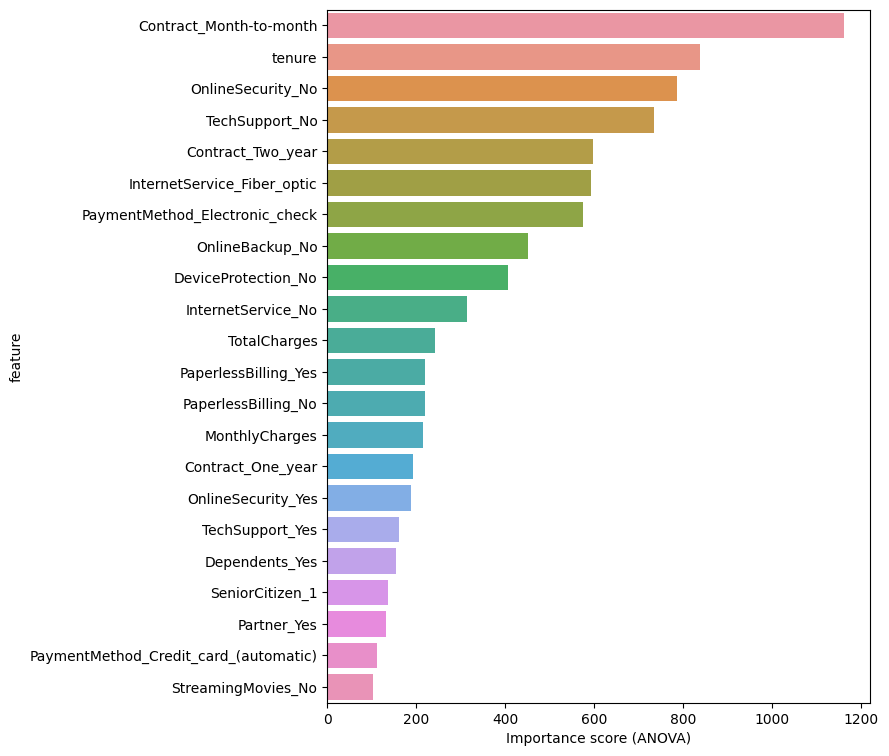

In [91]:
best_k = 22

plt.figure(figsize=(7, 9))
sns.barplot(y=importances.index[:best_k],
            x=importances['Importance score (ANOVA)'][:best_k])

### XGB feature selection

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4183, 35), (1793, 35), (4183,), (1793,))

In [38]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=40)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

scores = {}
scores['xgb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)
scores

{'xgb': 0.773}

In [40]:
xgb_importances = pd.DataFrame({"feature": X.columns, "importance": np.round(xgb.feature_importances_, 3)})
xgb_importances = xgb_importances.sort_values("importance", ascending=False).set_index("feature")
xgb_importances.head(20)

,importance
feature,
Contract_Month-to-month,0.399
InternetService_Fiber_optic,0.070
OnlineSecurity_No,0.053
InternetService_DSL,0.048
Contract_Two_year,0.037
StreamingTV_Yes,0.025
Contract_One_year,0.024
PhoneService_Yes,0.021
TechSupport_No,0.021


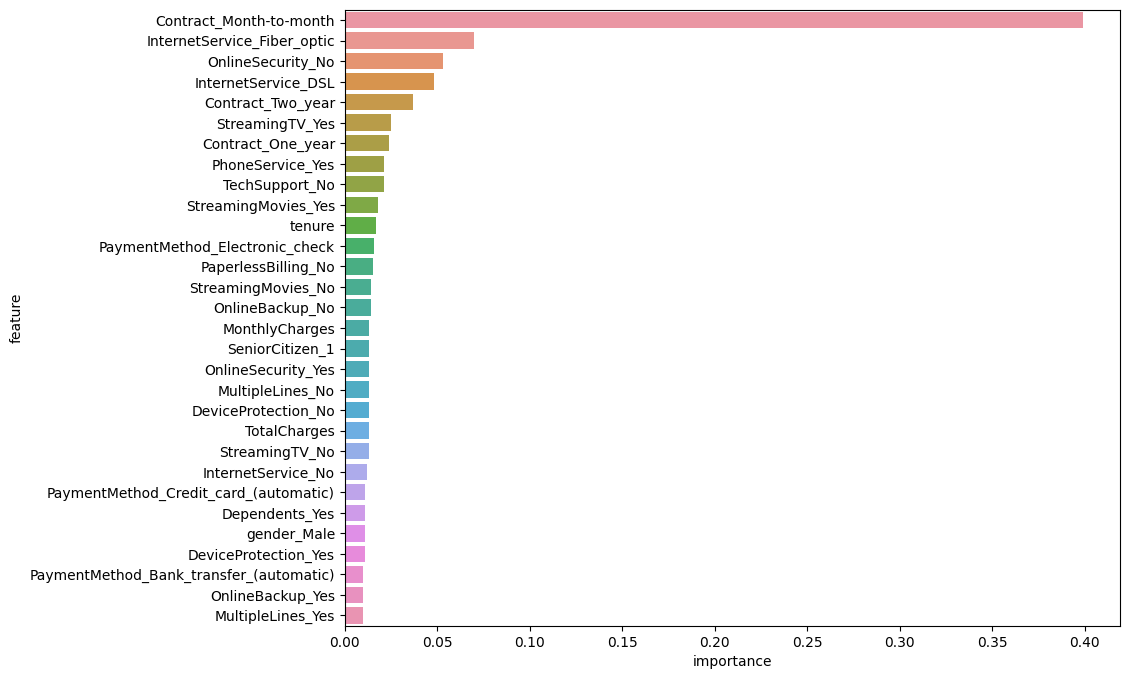

In [64]:
plt.figure(figsize=(10, 8))
sns.barplot(y=xgb_importances.head(30).index,
            x=xgb_importances.head(30).importance);

In [36]:
!pip install --pre pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [93]:
!pip install "schemdraw<0.16" #<-- To handle dependency issues

## Screen models on entire data

In [94]:
from pycaret.classification import *

clf = setup(data=pd.concat([X, y], axis=1),
            target='Churn_Yes',
            session_id=42,
            experiment_name='churn_screening',
            n_jobs=-1)

,Description,Value
0,Session id,42
1,Target,Churn_Yes
2,Target type,Binary
3,Original data shape,"(5976, 36)"
4,Transformed data shape,"(5976, 36)"
5,Transformed train set shape,"(4183, 36)"
6,Transformed test set shape,"(1793, 36)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [95]:
best_model = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7344,0.8241,0.7741,0.5003,0.6077,0.4207,0.4437,0.1720
lda,Linear Discriminant Analysis,0.7956,0.8318,0.5410,0.6358,0.5842,0.4500,0.4527,0.0780
lr,Logistic Regression,0.7997,0.8380,0.5266,0.6528,0.5827,0.4529,0.4576,1.5180
ada,Ada Boost Classifier,0.7966,0.8399,0.5248,0.6441,0.5781,0.4459,0.4501,0.3720
gbc,Gradient Boosting Classifier,0.7985,0.8385,0.5014,0.6591,0.5693,0.4409,0.4481,0.6220
ridge,Ridge Classifier,0.7958,0.0000,0.4888,0.6555,0.5597,0.4305,0.4386,0.0820
svm,SVM - Linear Kernel,0.7765,0.0000,0.5525,0.5965,0.5596,0.4134,0.4220,0.1140
lightgbm,Light Gradient Boosting Machine,0.7872,0.8248,0.4996,0.6268,0.5554,0.4179,0.4229,0.2820
xgboost,Extreme Gradient Boosting,0.7767,0.8074,0.5050,0.5944,0.5458,0.3991,0.4016,0.3180
knn,K Neighbors Classifier,0.7593,0.7706,0.5103,0.5512,0.5299,0.3684,0.3690,0.2020


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [96]:
best_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [98]:
chosen_model = create_model('nb', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7455,0.8282,0.7803,0.5148,0.6203,0.4408,0.4624
1,0.7372,0.8230,0.7703,0.5029,0.6085,0.4235,0.4454
2,0.7216,0.8181,0.7838,0.4847,0.5990,0.4034,0.4308
3,0.7237,0.8151,0.7703,0.4872,0.5969,0.4025,0.4269
4,0.7440,0.8360,0.7658,0.5120,0.6137,0.4334,0.4530
Mean,0.7344,0.8241,0.7741,0.5003,0.6077,0.4207,0.4437
Std,0.0100,0.0074,0.0068,0.0124,0.0088,0.0155,0.0133


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [99]:
tuned_model = tune_model(chosen_model,
                      n_iter=10,
                      optimize='f1',
                      fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7455,0.8282,0.7803,0.5148,0.6203,0.4408,0.4624
1,0.7372,0.8230,0.7703,0.5029,0.6085,0.4235,0.4454
2,0.7216,0.8181,0.7838,0.4847,0.5990,0.4034,0.4308
3,0.7237,0.8151,0.7703,0.4872,0.5969,0.4025,0.4269
4,0.7440,0.8360,0.7658,0.5120,0.6137,0.4334,0.4530
Mean,0.7344,0.8241,0.7741,0.5003,0.6077,0.4207,0.4437
Std,0.0100,0.0074,0.0068,0.0124,0.0088,0.0155,0.0133


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Screen models on 20 selected features

In [112]:
select_best_k = 20

indices = importances.index[:select_best_k]

X_selected = X[indices]
X_selected

,Contract_Month-to-month,tenure,OnlineSecurity_No,TechSupport_No,Contract_Two_year,InternetService_Fiber_optic,PaymentMethod_Electronic_check,OnlineBackup_No,DeviceProtection_No,InternetService_No,TotalCharges,PaperlessBilling_Yes,PaperlessBilling_No,MonthlyCharges,Contract_One_year,OnlineSecurity_Yes,TechSupport_Yes,Dependents_Yes,SeniorCitizen_1,Partner_Yes
0,False,1.611381,False,False,True,False,False,False,False,True,-0.247769,False,True,-1.353483,False,False,False,True,False,True
1,True,0.468468,True,True,False,True,False,False,False,False,0.736669,True,False,0.774066,False,False,False,False,False,False
2,True,0.223558,True,True,False,True,False,True,True,False,0.251453,True,False,0.335602,False,False,False,False,True,True
3,True,-1.164265,True,True,False,False,True,True,True,False,-0.905725,True,False,-0.297182,False,False,False,False,False,False
4,True,-1.245901,False,True,False,False,True,True,False,False,-0.958057,False,True,-0.378564,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,True,-1.286719,False,True,False,True,True,True,True,False,-0.968831,True,False,1.001603,False,True,False,False,False,True
5972,False,-0.388717,False,False,True,False,False,False,False,False,-0.043871,True,False,0.872057,False,True,True,True,False,True
5973,True,-0.837718,False,False,False,False,True,False,False,True,-0.876018,True,False,-1.451473,False,False,False,True,False,True
5974,True,-0.837718,True,True,False,True,True,True,False,False,-0.482824,True,False,1.149419,False,False,False,False,True,False


In [106]:
from pycaret.classification import *

clf = setup(data=pd.concat([X_selected, y], axis=1),
            target='Churn_Yes',
            session_id=43,
            experiment_name='churn_screening_selected',
            n_jobs=-1)

,Description,Value
0,Session id,43
1,Target,Churn_Yes
2,Target type,Binary
3,Original data shape,"(5976, 21)"
4,Transformed data shape,"(5976, 21)"
5,Transformed train set shape,"(4183, 21)"
6,Transformed test set shape,"(1793, 21)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [107]:
best_model = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7299,0.8257,0.7858,0.4950,0.6071,0.4172,0.4434,0.0760
lda,Linear Discriminant Analysis,0.7963,0.8294,0.5383,0.6392,0.5839,0.4505,0.4537,0.0560
lr,Logistic Regression,0.8004,0.8368,0.5212,0.6582,0.5812,0.4525,0.4582,0.9940
ada,Ada Boost Classifier,0.7999,0.8375,0.5202,0.6565,0.5803,0.4512,0.4566,0.2560
lightgbm,Light Gradient Boosting Machine,0.7937,0.8179,0.5176,0.6383,0.5713,0.4374,0.4418,1.2060
gbc,Gradient Boosting Classifier,0.7980,0.8359,0.5014,0.6580,0.5688,0.4400,0.4472,0.5160
ridge,Ridge Classifier,0.7978,0.0000,0.4978,0.6592,0.5666,0.4381,0.4458,0.0780
xgboost,Extreme Gradient Boosting,0.7779,0.8028,0.4951,0.5992,0.5420,0.3972,0.4005,0.2060
rf,Random Forest Classifier,0.7844,0.8140,0.4680,0.6266,0.5356,0.3990,0.4064,0.7400
knn,K Neighbors Classifier,0.7674,0.7673,0.4770,0.5769,0.5218,0.3700,0.3732,0.1040


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [108]:
best_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [109]:
chosen_model = create_model('nb', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7133,0.8174,0.8108,0.4762,0.6000,0.3992,0.4337
1,0.7395,0.8331,0.7928,0.5057,0.6175,0.4344,0.4596
2,0.7348,0.8292,0.7399,0.5015,0.5978,0.4107,0.4279
3,0.7273,0.8141,0.7883,0.4916,0.6055,0.4138,0.4408
4,0.7344,0.8345,0.7973,0.5000,0.6146,0.4278,0.4550
Mean,0.7299,0.8257,0.7858,0.4950,0.6071,0.4172,0.4434
Std,0.0092,0.0083,0.0242,0.0105,0.0078,0.0125,0.0121


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [110]:
tuned_model = tune_model(chosen_model,
                      n_iter=10,
                      optimize='f1',
                      fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7634,0.8181,0.7297,0.5400,0.6207,0.4543,0.4652
1,0.7873,0.8421,0.7027,0.5821,0.6367,0.4883,0.4926
2,0.7622,0.8211,0.6637,0.5441,0.5980,0.4315,0.4358
3,0.7739,0.8164,0.6937,0.5600,0.6197,0.4615,0.4668
4,0.7859,0.8349,0.7297,0.5765,0.6441,0.4940,0.5010
Mean,0.7746,0.8265,0.7039,0.5605,0.6239,0.4659,0.4723
Std,0.0107,0.0102,0.0247,0.0168,0.0160,0.0229,0.0230


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


## Screen models on 11 selected features

In [113]:
select_best_k = 11

indices = importances.index[:select_best_k]

X_selected = X[indices]
X_selected

,Contract_Month-to-month,tenure,OnlineSecurity_No,TechSupport_No,Contract_Two_year,InternetService_Fiber_optic,PaymentMethod_Electronic_check,OnlineBackup_No,DeviceProtection_No,InternetService_No,TotalCharges
0,False,1.611381,False,False,True,False,False,False,False,True,-0.247769
1,True,0.468468,True,True,False,True,False,False,False,False,0.736669
2,True,0.223558,True,True,False,True,False,True,True,False,0.251453
3,True,-1.164265,True,True,False,False,True,True,True,False,-0.905725
4,True,-1.245901,False,True,False,False,True,True,False,False,-0.958057
...,...,...,...,...,...,...,...,...,...,...,...
5971,True,-1.286719,False,True,False,True,True,True,True,False,-0.968831
5972,False,-0.388717,False,False,True,False,False,False,False,False,-0.043871
5973,True,-0.837718,False,False,False,False,True,False,False,True,-0.876018
5974,True,-0.837718,True,True,False,True,True,True,False,False,-0.482824


In [114]:
from pycaret.classification import *

clf = setup(data=pd.concat([X_selected, y], axis=1),
            target='Churn_Yes',
            session_id=43,
            experiment_name='churn_screening_selected',
            n_jobs=-1)

,Description,Value
0,Session id,43
1,Target,Churn_Yes
2,Target type,Binary
3,Original data shape,"(5976, 12)"
4,Transformed data shape,"(5976, 12)"
5,Transformed train set shape,"(4183, 12)"
6,Transformed test set shape,"(1793, 12)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [115]:
best_model = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7373,0.8260,0.7768,0.5037,0.6109,0.4260,0.4490,0.0460
nb,Naive Bayes,0.7153,0.8224,0.8065,0.4789,0.6008,0.4012,0.4344,0.0440
lda,Linear Discriminant Analysis,0.7961,0.8280,0.5482,0.6352,0.5882,0.4537,0.4561,0.0760
lr,Logistic Regression,0.7989,0.8360,0.5311,0.6500,0.5841,0.4533,0.4576,0.0540
svm,SVM - Linear Kernel,0.7717,0.0000,0.5976,0.5797,0.5780,0.4240,0.4319,0.0500
gbc,Gradient Boosting Classifier,0.7930,0.8345,0.5139,0.6371,0.5688,0.4346,0.4391,0.5760
ada,Ada Boost Classifier,0.7923,0.8350,0.5004,0.6399,0.5612,0.4278,0.4336,0.3500
ridge,Ridge Classifier,0.7934,0.0000,0.4780,0.6523,0.5515,0.4214,0.4302,0.0420
lightgbm,Light Gradient Boosting Machine,0.7798,0.8170,0.5005,0.6039,0.5471,0.4034,0.4066,0.2500
xgboost,Extreme Gradient Boosting,0.7774,0.8094,0.5004,0.5976,0.5445,0.3988,0.4017,0.1240


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [116]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [117]:
chosen_model = create_model('qda', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7276,0.8136,0.8108,0.4918,0.6122,0.4211,0.4524
1,0.7467,0.8402,0.7793,0.5149,0.6201,0.4418,0.4631
2,0.7324,0.8263,0.7354,0.4985,0.5942,0.4053,0.4224
3,0.7416,0.8168,0.7748,0.5089,0.6143,0.4323,0.4539
4,0.7380,0.8334,0.7838,0.5043,0.6138,0.4293,0.4533
Mean,0.7373,0.8260,0.7768,0.5037,0.6109,0.4260,0.4490
Std,0.0067,0.0100,0.0242,0.0080,0.0088,0.0122,0.0139


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [118]:
tuned_model = tune_model(chosen_model,
                      n_iter=10,
                      optimize='f1',
                      fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7479,0.8143,0.7568,0.5169,0.6143,0.4367,0.4542
1,0.7718,0.8411,0.7432,0.5518,0.6334,0.4729,0.4840
2,0.7515,0.8282,0.6951,0.5254,0.5985,0.4235,0.4322
3,0.7644,0.8202,0.7387,0.5413,0.6248,0.4589,0.4707
4,0.7703,0.8386,0.7477,0.5497,0.6336,0.4720,0.4838
Mean,0.7612,0.8285,0.7363,0.5370,0.6209,0.4528,0.4650
Std,0.0098,0.0103,0.0215,0.0137,0.0133,0.0196,0.0197


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


# Other test on extended dataset

In [120]:
path = '/content/drive/My Drive/Constructor_Academy/Gitlab/projects/telecom_churn_prediction/data/processed/onehot_encoding_standard_scaling_data.csv'
#path = '/content/drive/My Drive/Constructor_Academy/Gitlab/projects/telecom_churn_prediction/data/raw/telecom_users.csv'

df = pd.read_csv(path)
print(df.columns)
#df.drop("Unnamed: 0", axis=1, inplace=True)
#df.drop(columns="customerID", inplace=True)
df.drop(columns="gender_Female", inplace=True)
df.drop(columns="SeniorCitizen_0", inplace=True)
df.drop(columns="Partner_No", inplace=True)
df.drop(columns="Dependents_No", inplace=True)
df.drop(columns=["PhoneService_No", 'Churn_No'] , inplace=True)
,'OnlineSecurity_No_internet_service', 'OnlineBackup_No_internet_service',
#                 'DeviceProtection_No_internet_service', 'TechSupport_No_internet_service',
#                 'StreamingTV_No_internet_service', 'StreamingMovies_No_internet_service', 'Churn_No'
#                 ] , inplace=True)

print(df.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One_year',
       '

In [123]:
X = df.drop(columns=['Churn_Yes'], axis=1)
y = df['Churn_Yes']

X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No_phone_service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1.611381,-1.353483,-0.247769,True,False,True,True,True,False,False,...,False,False,False,True,True,False,False,True,False,False
1,0.468468,0.774066,0.736669,False,False,False,False,True,True,False,...,False,True,False,False,False,True,False,True,False,False
2,0.223558,0.335602,0.251453,False,True,True,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
3,-1.164265,-0.297182,-0.905725,True,False,False,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
4,-1.245901,-0.378564,-0.958057,True,False,False,False,True,True,False,...,False,True,False,False,True,False,False,False,True,False


In [124]:
from pycaret.classification import *

clf = setup(data=pd.concat([X, y], axis=1),
            target='Churn_Yes',
            session_id=42,
            experiment_name='churn_screening',
            n_jobs=-1)

,Description,Value
0,Session id,42
1,Target,Churn_Yes
2,Target type,Binary
3,Original data shape,"(5976, 42)"
4,Transformed data shape,"(5976, 42)"
5,Transformed train set shape,"(4183, 42)"
6,Transformed test set shape,"(1793, 42)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [125]:
best_model = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6909,0.8135,0.8452,0.4562,0.5924,0.3776,0.4244,0.0500
lda,Linear Discriminant Analysis,0.7956,0.8318,0.5410,0.6358,0.5842,0.4500,0.4527,0.0720
lr,Logistic Regression,0.7997,0.8380,0.5266,0.6528,0.5827,0.4529,0.4576,1.2800
ada,Ada Boost Classifier,0.7966,0.8399,0.5248,0.6441,0.5781,0.4459,0.4501,0.4420
gbc,Gradient Boosting Classifier,0.7985,0.8385,0.5014,0.6591,0.5693,0.4409,0.4481,0.8520
ridge,Ridge Classifier,0.7958,0.0000,0.4879,0.6560,0.5592,0.4302,0.4383,0.0440
lightgbm,Light Gradient Boosting Machine,0.7872,0.8248,0.4996,0.6268,0.5554,0.4179,0.4229,0.5740
xgboost,Extreme Gradient Boosting,0.7767,0.8074,0.5050,0.5944,0.5458,0.3991,0.4016,0.1880
svm,SVM - Linear Kernel,0.7597,0.0000,0.5625,0.5619,0.5417,0.3845,0.3956,0.0700
rf,Random Forest Classifier,0.7805,0.8110,0.4681,0.6152,0.5310,0.3913,0.3979,0.5440


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [126]:
best_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [127]:
chosen_model = create_model('nb', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.8197,0.8475,0.4690,0.6038,0.3970,0.4415
1,0.6858,0.8126,0.8423,0.4506,0.5871,0.3691,0.4164
2,0.6786,0.8094,0.8514,0.4447,0.5842,0.3619,0.4129
3,0.6758,0.8084,0.8378,0.4418,0.5785,0.3538,0.4020
4,0.7105,0.8174,0.8468,0.4747,0.6084,0.4064,0.4494
Mean,0.6909,0.8135,0.8452,0.4562,0.5924,0.3776,0.4244
Std,0.0138,0.0044,0.0047,0.0133,0.0116,0.0204,0.0180


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [128]:
tuned_model = tune_model(chosen_model,
                      n_iter=10,
                      optimize='f1',
                      fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.8197,0.8475,0.4690,0.6038,0.3970,0.4415
1,0.6858,0.8126,0.8423,0.4506,0.5871,0.3691,0.4164
2,0.6786,0.8094,0.8514,0.4447,0.5842,0.3619,0.4129
3,0.6758,0.8084,0.8378,0.4418,0.5785,0.3538,0.4020
4,0.7105,0.8174,0.8468,0.4747,0.6084,0.4064,0.4494
Mean,0.6909,0.8135,0.8452,0.4562,0.5924,0.3776,0.4244
Std,0.0138,0.0044,0.0047,0.0133,0.0116,0.0204,0.0180


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [132]:
path = '/content/drive/My Drive/Constructor_Academy/Gitlab/projects/telecom_churn_prediction/data/processed/models_performance.csv'

results = pd.read_csv(path, delimiter=';')
results

,Method,Features,Model,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC
0,PyCaret,All,Naive Bayes,0.7344,0.8241,0.7741,0.5003,0.6077,0.4207,0.4437
1,PyCaret,20 most important,Naive Bayes,0.7746,0.8265,0.7039,0.5605,0.6239,0.4659,0.4723
2,PyCaret,11 most important,Quadratic Discriminant Analysis,0.7612,0.8285,0.7363,0.5370,0.6209,0.4528,0.4650


In [133]:
results = pd.read_csv('data/processed/models_performance.csv', delimiter=';')

FileNotFoundError: ignored